In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from mlptools.io.read import read_from_n2p2_data

# path2target = path2target = "/home/y1u0d2/result/n2p2/Si/95/cut_3.77"
path2target = path2target = "/Users/y1u0d2/desktop/Lab/result/n2p2/Si/102/data"
mlpatoms = read_from_n2p2_data(path2target)

0 / 41237
1000 / 41237
2000 / 41237
3000 / 41237
4000 / 41237
5000 / 41237
6000 / 41237
7000 / 41237
8000 / 41237
9000 / 41237
10000 / 41237
11000 / 41237
12000 / 41237
13000 / 41237
14000 / 41237
15000 / 41237
16000 / 41237
17000 / 41237
18000 / 41237
19000 / 41237
20000 / 41237
21000 / 41237
22000 / 41237
23000 / 41237
24000 / 41237
25000 / 41237
26000 / 41237
27000 / 41237
28000 / 41237
29000 / 41237
30000 / 41237
31000 / 41237
32000 / 41237
33000 / 41237
34000 / 41237
35000 / 41237
36000 / 41237
37000 / 41237
38000 / 41237
39000 / 41237
40000 / 41237
41000 / 41237


In [3]:
# plot energy
energy_df = pd.DataFrame([[atom.get_atomic_energy(), atom.get_atomic_volume(), atom.structure_id, atom.n_atoms] for atom in mlpatoms],
    columns=['energy', 'volume', 'structure_id', 'n_atoms'])

In [4]:
energy_df.value_counts("structure_id")

structure_id
amorphous       11983
mp-149           7170
mp-165           6426
mp-92            5222
mp-1079649       3712
mp-571520        3352
diamond          2482
mp-slab           561
mp-four           149
mp-three          100
mp-149_dimer       80
Name: count, dtype: int64

In [5]:
energy_df.loc[energy_df['structure_id'] == 'amorphous']['n_atoms'].min(), energy_df.loc[energy_df['structure_id'] == 'amorphous']['n_atoms'].max()

(15, 109)

In [6]:
blacklist = ['mp-three', 'mp-four', 'mp-149_dimer', 'mp-slab', 'amorphous']
energy_df = energy_df[~energy_df['structure_id'].isin(blacklist)]

In [10]:
structure_id_name_mapper = {
    "Cubic": ["mp-149", "diamond"],
    "Hexagonal": ["mp-165"],
    "Tetragonal": ["mp-92"],
    "Orthorhombic": ["mp-1079649"],
    "Trigonal": ["mp-571520"]
}
# change strucrture_id to structure_name
for k, v in structure_id_name_mapper.items():
    energy_df.loc[energy_df['structure_id'].isin(v), 'structure_id'] = k

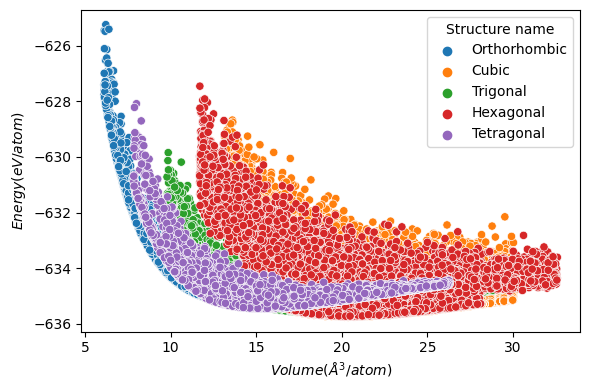

In [17]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data=energy_df, x='volume', y='energy', hue='structure_id')
ax.set_xlabel(r'$Volume(\AA^{3} / atom)$')
ax.set_ylabel(r'$Energy (eV / atom)$')
# change legend title from structure_id to structure_name
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, title='Structure name')
plt.tight_layout()

In [6]:
dimers = [atom for atom in mlpatoms if atom.n_atoms == 2]

In [ ]:
dimer_energy = [[dimer.get_atomic_distance(), dimer.get_atomic_energy()] for dimer in dimers]
dimer_energy_df = pd.DataFrame(dimer_energy, columns=['distance', 'energy'])
dimer_energy_df.sort_values(by='distance', inplace=True)
dimer_energy_df.reset_index(drop=True, inplace=True)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(dimer_energy_df['distance'], dimer_energy_df['energy'], marker='o')
ax.set_xlabel('distance (ang)')
ax.set_ylabel('energy (eV)')
ax.set_title('Si dimer')

In [ ]:
# plot force
force_df = []
for atom in mlpatoms:
    tmp_df = pd.DataFrame(atom.force, columns=['fx', 'fy', 'fz'])
    tmp_df['structure_id'] = atom.structure_id
    force_df.append(tmp_df)

force_df = pd.concat(force_df, ignore_index=True)

In [ ]:
sns.scatterplot(data=force_df, x='fx', y='fy', hue='structure_id')

In [17]:
atom = mlpatoms[0]

In [20]:
# get elements from list randomly
from random import sample
sample(mlpatoms, 10)

In [19]:
import random

atom = mlpatoms[0]
rdf_x = atom.get_rdf(rcut=6.0, bins=200)[:, 0]
rdf_val_list = []
for atom in mlpatoms:
    rdf_val = atom.get_rdf(rcut=6.0, bins=200)[:, 1]
    rdf_val_list.append(rdf_val)
rdf_val_list = np.array(rdf_val_list)

(0.0, 2.5)

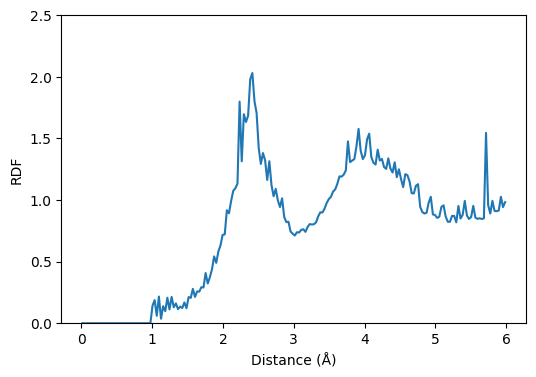

In [23]:
mean_rdf = np.mean(rdf_val_list, axis=0)
std_rdf = np.std(rdf_val_list, axis=0)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(rdf_x, mean_rdf)
# ax.fill_between(rdf_x, mean_rdf - std_rdf, mean_rdf + std_rdf, alpha=0.3)
ax.set_xlabel('Distance (Å)')
ax.set_ylabel('RDF')
ax.set_ylim(0, 2.5)